In [2]:
# Load necessary packages here:
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [3]:
# Set the working directory to your project folder
os.chdir('C://Users//raksh//OneDrive//Desktop//UoA//Courses//Term 1//MIS 545 Data mining//anilsharma87-sales')

In [5]:
# read excel file to a dataframe called amazon_sale

amazon_sale = pd.read_excel('AmazonSale.xlsx')


In [6]:
# print the first 5 rows of the dataframe

print(amazon_sale.head())


              Order ID       Date                        Status Fulfilment  \
0  405-8078784-5731545 2022-04-30                     Cancelled   Merchant   
1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   Merchant   
2  404-0687676-7273146 2022-04-30                       Shipped     Amazon   
3  403-9615377-8133951 2022-04-30                     Cancelled   Merchant   
4  407-1069790-7240320 2022-04-30                       Shipped     Amazon   

  Sales Channel  ship-service-level    Style              SKU       Category  \
0      Amazon.in           Standard   SET389   SET389-KR-NP-S            Set   
1      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL          kurta   
2      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL          kurta   
3      Amazon.in           Standard    J0341       J0341-DR-L  Western Dress   
4      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL            Top   

  Size  ... currency  Amount    ship-city   ship-s

In [7]:
# get all the column names

print(amazon_sale.columns)


Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')


In [8]:
# create a data frame and read the data from the excel file

amazon_sale = pd.DataFrame(pd.read_excel('AmazonSale.xlsx'))

In [9]:
# print the first 5 rows of the dataframe

print(amazon_sale.head())

              Order ID       Date                        Status Fulfilment  \
0  405-8078784-5731545 2022-04-30                     Cancelled   Merchant   
1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   Merchant   
2  404-0687676-7273146 2022-04-30                       Shipped     Amazon   
3  403-9615377-8133951 2022-04-30                     Cancelled   Merchant   
4  407-1069790-7240320 2022-04-30                       Shipped     Amazon   

  Sales Channel  ship-service-level    Style              SKU       Category  \
0      Amazon.in           Standard   SET389   SET389-KR-NP-S            Set   
1      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL          kurta   
2      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL          kurta   
3      Amazon.in           Standard    J0341       J0341-DR-L  Western Dress   
4      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL            Top   

  Size  ... currency  Amount    ship-city   ship-s

In [10]:
# remove the rows with Status = 'Cancelled'

amazon_sale = amazon_sale[amazon_sale['Status'] != 'Cancelled']


In [11]:
#print the first 5 rows of the dataframe

print(amazon_sale.head())


              Order ID       Date                        Status Fulfilment  \
1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   Merchant   
2  404-0687676-7273146 2022-04-30                       Shipped     Amazon   
4  407-1069790-7240320 2022-04-30                       Shipped     Amazon   
5  404-1490984-4578765 2022-04-30                       Shipped     Amazon   
6  408-5748499-6859555 2022-04-30                       Shipped     Amazon   

  Sales Channel  ship-service-level    Style              SKU Category Size  \
1      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL    kurta  3XL   
2      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL    kurta   XL   
4      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL      Top  3XL   
5      Amazon.in          Expedited   SET264  SET264-KR-NP-XL      Set   XL   
6      Amazon.in          Expedited    J0095      J0095-SET-L      Set    L   

   ... currency Amount    ship-city     ship-state  ship

In [12]:
# remove the space in the column names

amazon_sale.columns = amazon_sale.columns.str.replace('_', '').str.replace('-','').str.replace(' ','')


In [13]:
# convert the column names to lower case

amazon_sale.columns = amazon_sale.columns.str.lower()

In [14]:
# create a new data frame called as popularityDF with the following columns orderid, status, style, date, qty, and sku

popularDF = amazon_sale[['orderid', 'status', 'style', 'date', 'qty', 'sku']]

In [15]:
# print the first 5 rows of the dataframe

print(popularDF.head())

               orderid                        status    style       date  qty  \
1  171-9198151-1101146  Shipped - Delivered to Buyer  JNE3781 2022-04-30    1   
2  404-0687676-7273146                       Shipped  JNE3371 2022-04-30    1   
4  407-1069790-7240320                       Shipped  JNE3671 2022-04-30    1   
5  404-1490984-4578765                       Shipped   SET264 2022-04-30    1   
6  408-5748499-6859555                       Shipped    J0095 2022-04-30    1   

               sku  
1  JNE3781-KR-XXXL  
2    JNE3371-KR-XL  
4  JNE3671-TU-XXXL  
5  SET264-KR-NP-XL  
6      J0095-SET-L  


In [16]:
#check for null values and remove them

print(popularDF.isnull().sum())

orderid    0
status     0
style      0
date       0
qty        0
sku        0
dtype: int64


In [17]:
#drop duplicates

popularDF = popularDF.drop_duplicates()

In [18]:
#print the first 5 rows of the dataframe

print(popularDF.head())

               orderid                        status    style       date  qty  \
1  171-9198151-1101146  Shipped - Delivered to Buyer  JNE3781 2022-04-30    1   
2  404-0687676-7273146                       Shipped  JNE3371 2022-04-30    1   
4  407-1069790-7240320                       Shipped  JNE3671 2022-04-30    1   
5  404-1490984-4578765                       Shipped   SET264 2022-04-30    1   
6  408-5748499-6859555                       Shipped    J0095 2022-04-30    1   

               sku  
1  JNE3781-KR-XXXL  
2    JNE3371-KR-XL  
4  JNE3671-TU-XXXL  
5  SET264-KR-NP-XL  
6      J0095-SET-L  


In [19]:
#show summary statistics of the dataframe

print(popularDF.describe())

                                date            qty
count                         110640  110640.000000
mean   2022-05-12 14:01:42.299349504       1.003154
min              2022-03-31 00:00:00       0.000000
25%              2022-04-20 00:00:00       1.000000
50%              2022-05-10 00:00:00       1.000000
75%              2022-06-04 00:00:00       1.000000
max              2022-06-29 00:00:00      15.000000
std                              NaN       0.100339


In [20]:
# aggregate the data to find number of transactions per sku

product_transactions = popularDF['sku'].value_counts()

In [21]:
# determine the threshold for popular products

threshold = product_transactions.median()
threshold

7.0

In [22]:
# Create a binary target variable "ispopular" for popular products

popularDF['ispopular'] = popularDF['sku'].apply(lambda x: 1 if product_transactions[x] > threshold else 0)



In [23]:
#import LabelEncoder

from sklearn.preprocessing import LabelEncoder
# Encode style and sku columns

le_style = LabelEncoder()
le_sku = LabelEncoder()
popularDF['Style_Encoded'] = le_style.fit_transform(popularDF['style'])
popularDF['SKU_Encoded'] = le_sku.fit_transform(popularDF['sku'])

In [24]:
#display first 5 rows of the dataframe

print(popularDF.head())

               orderid                        status    style       date  qty  \
1  171-9198151-1101146  Shipped - Delivered to Buyer  JNE3781 2022-04-30    1   
2  404-0687676-7273146                       Shipped  JNE3371 2022-04-30    1   
4  407-1069790-7240320                       Shipped  JNE3671 2022-04-30    1   
5  404-1490984-4578765                       Shipped   SET264 2022-04-30    1   
6  408-5748499-6859555                       Shipped    J0095 2022-04-30    1   

               sku  ispopular  Style_Encoded  SKU_Encoded  
1  JNE3781-KR-XXXL          1            845         4387  
2    JNE3371-KR-XL          1            531         2596  
4  JNE3671-TU-XXXL          1            752         3790  
5  SET264-KR-NP-XL          1           1230         6207  
6      J0095-SET-L          1            179          650  


In [25]:
# Select orderid, status, style, date, qty, and sku as features and popularity as target

features = popularDF[['Style_Encoded', 'qty', 'SKU_Encoded']]
target = popularDF['ispopular']

In [26]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [27]:
# Creating and training the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [33]:
from sklearn.utils import resample

# Combine training data back for resampling
X = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes
majority = X[X.ispopular == 1]
minority = X[X.ispopular == 0]

# Upsample minority class
minority_upsampled = resample(minority,
                              replace=True,     # Sample with replacement
                              n_samples=len(majority),    # to match majority class
                              random_state=42)   # reproducible results

# Combine majority class with upsampled minority class
upsampled = pd.concat([majority, minority_upsampled])

# Split upsampled data into X and y sets
X_train_upsampled = upsampled.drop('ispopular', axis=1)
y_train_upsampled = upsampled.ispopular


In [34]:
from sklearn.linear_model import LogisticRegression

# Creating and training the logistic regression model with class weight adjustment
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_upsampled, y_train_upsampled)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
# Predicting and evaluating the model
predictions = model.predict(X_test)
report = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

In [37]:
#display classification report and confusion matrix
print(report)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.13      0.52      0.21      3810
           1       0.90      0.56      0.69     29382

    accuracy                           0.56     33192
   macro avg       0.52      0.54      0.45     33192
weighted avg       0.81      0.56      0.64     33192

[[ 1969  1841]
 [12803 16579]]


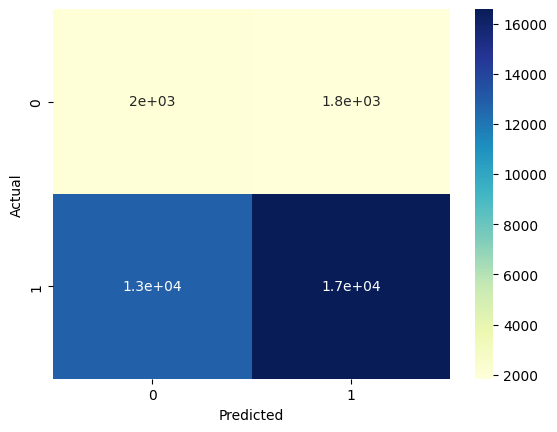

In [38]:
#visualize the confusion matrix and give labels
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [40]:
#display the coefficients of the model with labels
print(model.coef_)


[[-0.00638861 -0.00015128  0.00128121]]
